In [6]:
import os
import json
from shutil import copy
import tensorflow as tf
from pathlib import Path
from PIL import Image

# Scientific modules import
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# AxonDeepSeg import modules
from AxonDeepSeg.apply_model import axon_segmentation
from AxonDeepSeg.testing.segmentation_scoring import Metrics_calculator
import AxonDeepSeg.ads_utils as ads
from config import axonmyelin_suffix

%matplotlib inline

print('done')

done


In [10]:
# Modify the lines below to use your image
path_img = Path('/home/users/kwu2/axondeepseg/KW_data/KW_TEM_3class/Testing/ads_20210318_montages/p10-5-6000x/image.png')
path_folder, file_name = os.path.split(path_img)
print(path_folder)
print(file_name)

/home/users/kwu2/axondeepseg/KW_data/KW_TEM_3class/Testing/ads_20210318_montages/p10-5-6000x
image.png


In [11]:
Image.MAX_IMAGE_PIXELS = 1000000000

In [12]:
# Set paths
img = ads.imread(path_img)
#path_folder, file_name = os.path.split(path_img)
model_name = 'TEM_2021-06-08_14-58-45'
path_model = os.path.join('..','models',model_name)
path_configfile = os.path.join(path_model,'config_network.json')
with open(path_configfile, 'r') as fd:
    config_network = json.loads(fd.read())


# reset the tensorflow graph for new testing
tf.reset_default_graph()
prediction = axon_segmentation(path_folder, file_name, path_model, config_network, resampled_resolutions=0.01, verbosity_level=3)

print('done')

Loading acquisitions ...
Rescaling acquisitions to the target resolution ...
Graph construction ...
Beginning inference ...
processing patch 1 of 9
processing patch 2 of 9
processing patch 3 of 9
processing patch 4 of 9
processing patch 5 of 9
processing patch 6 of 9
processing patch 7 of 9
processing patch 8 of 9
processing patch 9 of 9


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


done


In [13]:
# Prediction image (output of AxonDeepSeg)
pred = ads.imread(os.path.join(path_folder,'image' + str(axonmyelin_suffix)))
pred_axon = pred > 200
pred_myelin = np.logical_and(pred >= 50, pred <= 200)

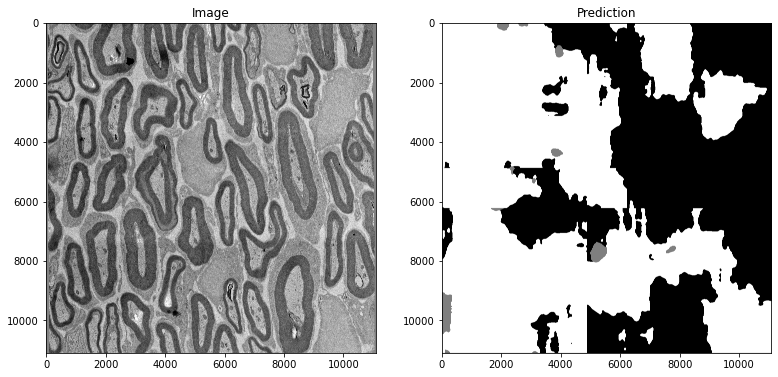

In [14]:
fig, axes = plt.subplots(1,2, figsize=(13,10))
ax1, ax2 = axes[0], axes[1]
ax1.set_title('Image')
ax1.imshow(img,cmap='gray')
ax2.set_title('Prediction')
ax2.imshow(pred,cmap='gray')
plt.show();